In [1]:
% matplotlib inline
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
sc = StandardScaler()

In [2]:
print(boston.feature_names)
print(boston.data.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


Breaking at Iteration: 10


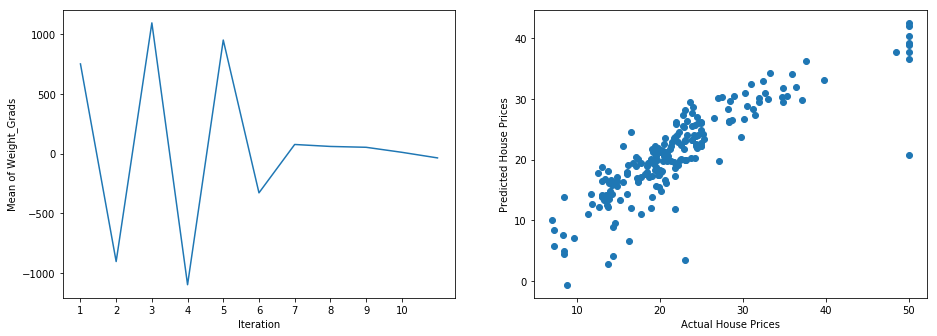

Sample Actual vs Prediction Prices: [(27.5, 30.28924710397126), (17.1, 18.867484405362955), (21.5, 22.882870980720874), (23.0, 28.112626553597433), (31.0, 32.40827014874152)]
MSE: 20.92472230725548
Weights: [-0.5878918046417196, 0.49224817826470124, -0.0019364849205797006, 0.8016543313043856, -0.10351652648851851, 3.6266172237747565, 0.18136275627481355, -0.8989774880263259, 0.25129213001248957, -0.6081766976129905, -1.3696301163405862, 0.8347762304944257, -3.0494118818836795]
Intercept: 21.084670780379362


In [28]:
def sgd_regressor():
    batch_size = 200
    raw_data = np.hstack((boston.data, boston.target.reshape(-1,1)))
    epochs = 150
    tolerance = 1*np.e**(-5)
    w = np.random.rand(boston.data.shape[1], 1)
    b = np.random.random((1,1))
    r = 0.001
    w_means = []

    for iter in range(epochs):
        idx = np.random.choice(boston.target.shape[0], batch_size, replace=False)
        x = raw_data[idx, :-1]
        x = sc.fit_transform(x)
        y = raw_data[idx, -1]

        w_diff_sum = np.array([((-2*x[i]) * (y[i] - (w.T.dot(x[i]))[0] - b)[0]) \
                               for i in range(batch_size)]).sum(axis=0).reshape((-1,1))
        b_diff_sum = np.array([((-2) * (y[i] - (w.T.dot(x[i]))[0] - b)[0]) \
                               for i in range(batch_size)]).sum(axis=0).reshape((-1,1))
        w_old = w; b_old = b;
        w = w - (r * w_diff_sum)
        w_means.append(w_diff_sum.mean())
        b = b - (r * b_diff_sum)
        r -= 0.0001
        if np.all((w - w_old) < tolerance) and np.all((b - b_old) < tolerance):
            print(f'Breaking at Iteration: {iter}')
            break
        # print(w[:1], b[:1])

    plt.figure(1)
    plt.subplot(121)
    plt.plot(range(1, len(w_means)+1, 1), w_means)
    plt.xlabel('Iteration')
    plt.ylabel('Mean of Weight_Grads')
    plt.xticks(range(1,11))
    
    pred = np.array([((w.T.dot(x[i]))[0] + b)[0] for i in range(batch_size)])
    mse = sum([((y[i]-pred[i])**2)/batch_size for i in range(batch_size)])

    plt.subplot(122)
    plt.scatter(y, pred)
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    
    plt.subplots_adjust(left=1.0, right=3.0, bottom=0.0, top=1.0)
    plt.show()
    print(f'Sample Actual vs Prediction Prices: {list(zip(y[:5], pred[:5,0]))}')
    print(f'MSE: {mse[0]}')
    print(f'Weights: {[i[0] for i in w]}')
    print(f'Intercept: {b[0][0]}')

sgd_regressor()

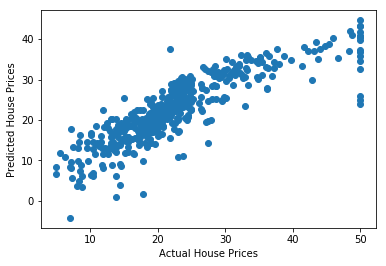

Sample Actual vs Prediction Prices: [(24.0, 30.008212692344628), (21.6, 25.0298606038187), (34.7, 30.570231695891614), (33.4, 28.608140549202286), (36.2, 27.942882319320447)]
MSE: 21.897779217687496
Weights: [-0.92041113  1.08098058  0.14296712  0.68220346 -2.06009246  2.67064141
  0.02112063 -3.10444805  2.65878654 -2.07589814 -2.06215593  0.85664044
 -3.74867982]
Intercept: 22.532806324110688


In [67]:
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt

x = sc.fit_transform(boston.data)
y = boston.target

lm = LinearRegression()
lm.fit(x, y)
Y_pred = lm.predict(x)

plt.scatter(y, Y_pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

print(f'Sample Actual vs Prediction Prices: {list(zip(y[:5], Y_pred[:5]))}')
print(f'MSE: {mean_squared_error(y, Y_pred)}')
print(f'Weights: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')

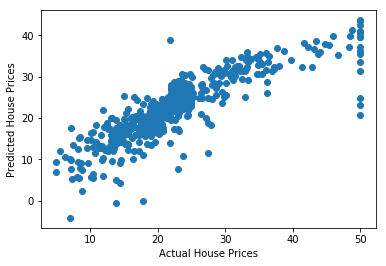

Sample Actual vs Prediction Prices: [(24.0, 30.41199752834426), (21.6, 24.808443707782885), (34.7, 30.756831791539014), (33.4, 29.229543477596458), (36.2, 28.7364324281715)]
MSE: 22.854113377368183
Weights: [-0.65251841  0.56614491 -0.39369246  0.79231056 -0.96303868  3.17265317
 -0.14339605 -2.05128859  0.85003226 -0.50363584 -1.82830933  0.89373598
 -3.41240203]
Intercept: [22.27398545]


In [63]:
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt

x = sc.fit_transform(boston.data)
y = boston.target

sgd = SGDRegressor(penalty=None, max_iter=100, eta0=0.001, tol=1*np.e**(-5))
sgd.fit(x, y)
Y_pred = sgd.predict(x)

plt.scatter(y, Y_pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

print(f'Sample Actual vs Prediction Prices: {list(zip(y[:5], Y_pred[:5]))}')
print(f'MSE: {mean_squared_error(y, Y_pred)}')
print(f'Weights: {sgd.coef_}')
print(f'Intercept: {sgd.intercept_}')